In [ ]:
#Para acessar as imagens do Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2

# Carregar uma imagem do dataset (ajuste o caminho conforme sua estrutura)
image_path = '/content/drive/MyDrive/UFC/TCC/dataset_odonto_ufc/Dataset_Mask_Copia_Com_Itens_Excluidos_UFC/101_22A_M.jpg'
image = load_img(img_path, target_size=(128, 128))
image_array = img_to_array(image).astype(np.uint8)


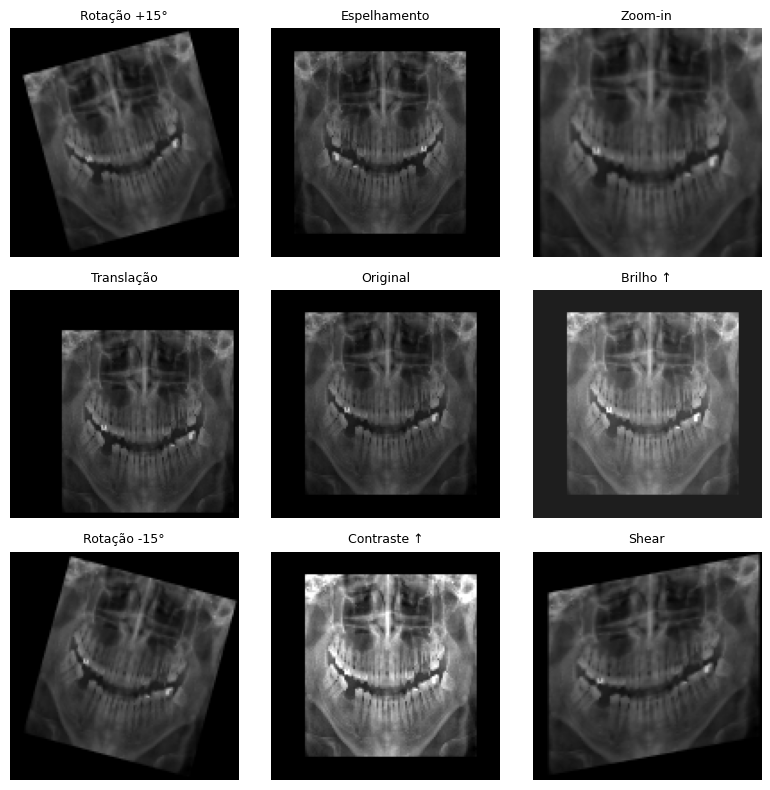

In [ ]:
# Criar transformações manuais
# 1. Original
original = image_array

# 2. Rotação +15°
M = cv2.getRotationMatrix2D((64, 64), 15, 1)
rotated_15 = cv2.warpAffine(original, M, (128, 128))

# 3. Rotação -15°
M = cv2.getRotationMatrix2D((64, 64), -15, 1)
rotated_minus_15 = cv2.warpAffine(original, M, (128, 128))

# 4. Espelhamento horizontal
flipped = cv2.flip(original, 1)

# 5. Zoom-in (recortar centro e redimensionar)
zoom_in = cv2.resize(original[16:112, 16:112], (128, 128))

# 6. Translação (deslocar imagem para baixo e direita)
M = np.float32([[1, 0, 10], [0, 1, 10]])
translated = cv2.warpAffine(original, M, (128, 128))

# 7. Brilho aumentado
bright = cv2.convertScaleAbs(original, alpha=1.3, beta=30)

# 8. Contraste aumentado
contrast = cv2.convertScaleAbs(original, alpha=2.0, beta=0)

# 9. Shear (cisalhamento)
pts1 = np.float32([[20, 20], [108, 20], [20, 108]])
pts2 = np.float32([[10, 30], [118, 10], [10, 118]])
M_shear = cv2.getAffineTransform(pts1, pts2)
sheared = cv2.warpAffine(original, M_shear, (128, 128))

# Montar grid com legendas
titles = ["Rotação +15°", "Espelhamento", "Zoom-in",
          "Translação", "Original", "Brilho ↑",
          "Rotação -15°", "Contraste ↑", "Shear"]

images = [rotated_15, flipped, zoom_in,
          translated, original, bright,
          rotated_minus_15, contrast, sheared]

fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i].astype(np.uint8))
    ax.set_title(titles[i], fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()